In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.stats import gaussian_kde

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "4"


C:\Users\Ferdie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


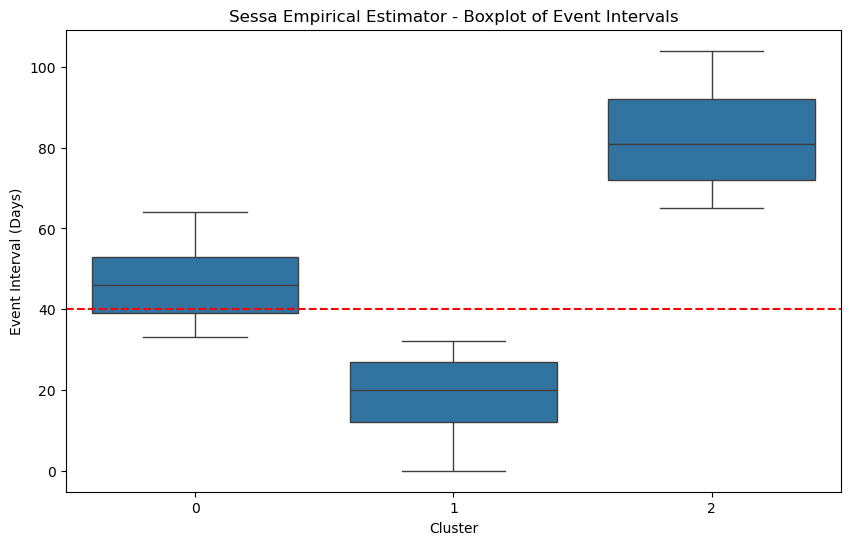

Silhouette Score - KMeans: 0.5727058894427505, DBSCAN: -1


In [99]:
# dataset 
data = pd.read_csv("med_events.csv")


data['DATE'] = pd.to_datetime(data['DATE'])


data.sort_values(by=['PATIENT_ID', 'DATE'], inplace=True)


data['prev_DATE'] = data.groupby('PATIENT_ID')['DATE'].shift(1)
data['event_interval'] = (data['DATE'] - data['prev_DATE']).dt.days


filtered_data = data.dropna(subset=['event_interval'])


threshold = filtered_data['event_interval'].quantile(0.80)
filtered_data = filtered_data[filtered_data['event_interval'] <= threshold]

# Apply K-Means 
X = filtered_data[['event_interval']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
filtered_data['kmeans_cluster'] = kmeans_labels

# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
filtered_data['dbscan_cluster'] = dbscan_labels

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['kmeans_cluster'], y=filtered_data['event_interval'])
plt.axhline(y=filtered_data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('Sessa Empirical Estimator - Boxplot of Event Intervals')
plt.xlabel('Cluster')
plt.ylabel('Event Interval (Days)')
plt.show()

# Compare scores
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Silhouette Score - KMeans: {silhouette_kmeans}, DBSCAN: {silhouette_dbscan}')

C:\Users\Ferdie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


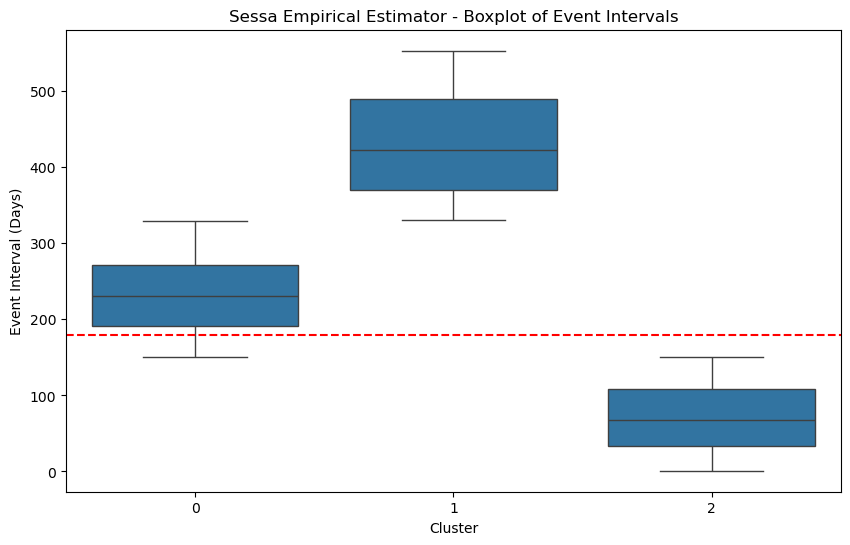

Silhouette Score - KMeans: 0.5961393774383681, DBSCAN: 0.49468489420800804


In [83]:

# prescription data
np.random.seed(42)
n_patients = 500
n_prescriptions = 2000

data = pd.DataFrame({
    'PATIENT_ID': np.random.randint(1, n_patients, n_prescriptions),
    'DATE': pd.date_range(start='2020-01-01', periods=n_prescriptions, freq='D')
})
data['prev_DATE'] = data.groupby('PATIENT_ID')['DATE'].shift(1)
data.dropna(inplace=True)
data['event_interval'] = (data['DATE'] - data['prev_DATE']).dt.days

# Remove the upper 20% 
threshold = np.percentile(data['event_interval'], 80)
data = data[data['event_interval'] <= threshold]

# Apply K-Means 
X = data[['event_interval']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans_labels

# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_cluster'] = dbscan_labels

# Boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['kmeans_cluster'], y=data['event_interval'])
plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('Sessa Empirical Estimator - Boxplot of Event Intervals')
plt.xlabel('Cluster')
plt.ylabel('Event Interval (Days)')
plt.show()

# Compare scores
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Silhouette Score - KMeans: {silhouette_kmeans}, DBSCAN: {silhouette_dbscan}')


C:\Users\Ferdie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


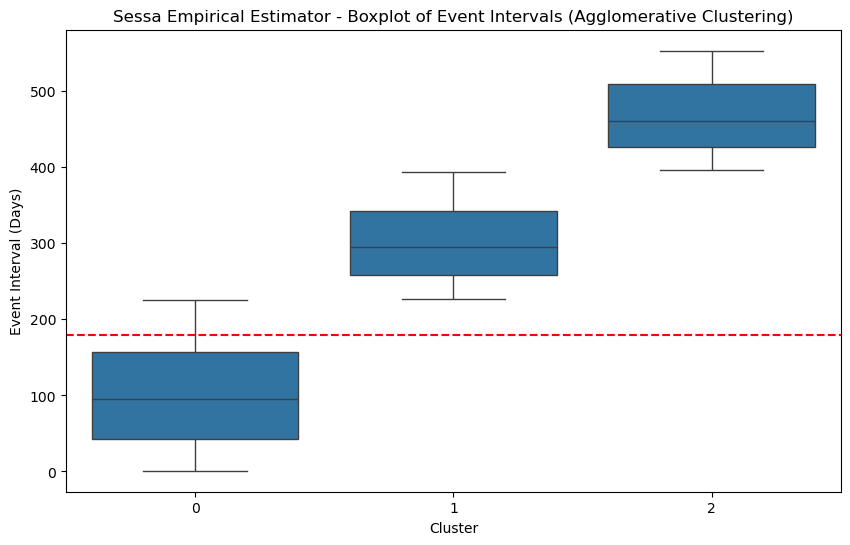

Silhouette Score - KMeans: 0.5961393774383681, DBSCAN: 0.49468489420800804, Agglomerative: 0.5681789886445706


In [85]:

#  data
np.random.seed(42)
n_patients = 500
n_prescriptions = 2000

data = pd.DataFrame({
    'PATIENT_ID': np.random.randint(1, n_patients, n_prescriptions),
    'DATE': pd.date_range(start='2020-01-01', periods=n_prescriptions, freq='D')
})

data['prev_DATE'] = data.groupby('PATIENT_ID')['DATE'].shift(1)
data.dropna(inplace=True)
data['event_interval'] = (data['DATE'] - data['prev_DATE']).dt.days

# Remove the upper 20% 
threshold = np.percentile(data['event_interval'], 80)
data = data[data['event_interval'] <= threshold]

# Apply K-Means 
X = data[['event_interval']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans_labels

# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_cluster'] = dbscan_labels

# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
data['agglo_cluster'] = agglo_labels

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['agglo_cluster'], y=data['event_interval'])
plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('Sessa Empirical Estimator - Boxplot of Event Intervals (Agglomerative Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Event Interval (Days)')
plt.show()

# Compare scores
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_agglo = silhouette_score(X, agglo_labels)

print(f'Silhouette Score - KMeans: {silhouette_kmeans}, DBSCAN: {silhouette_dbscan}, Agglomerative: {silhouette_agglo}')

Optimal K: 2


C:\Users\Ferdie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


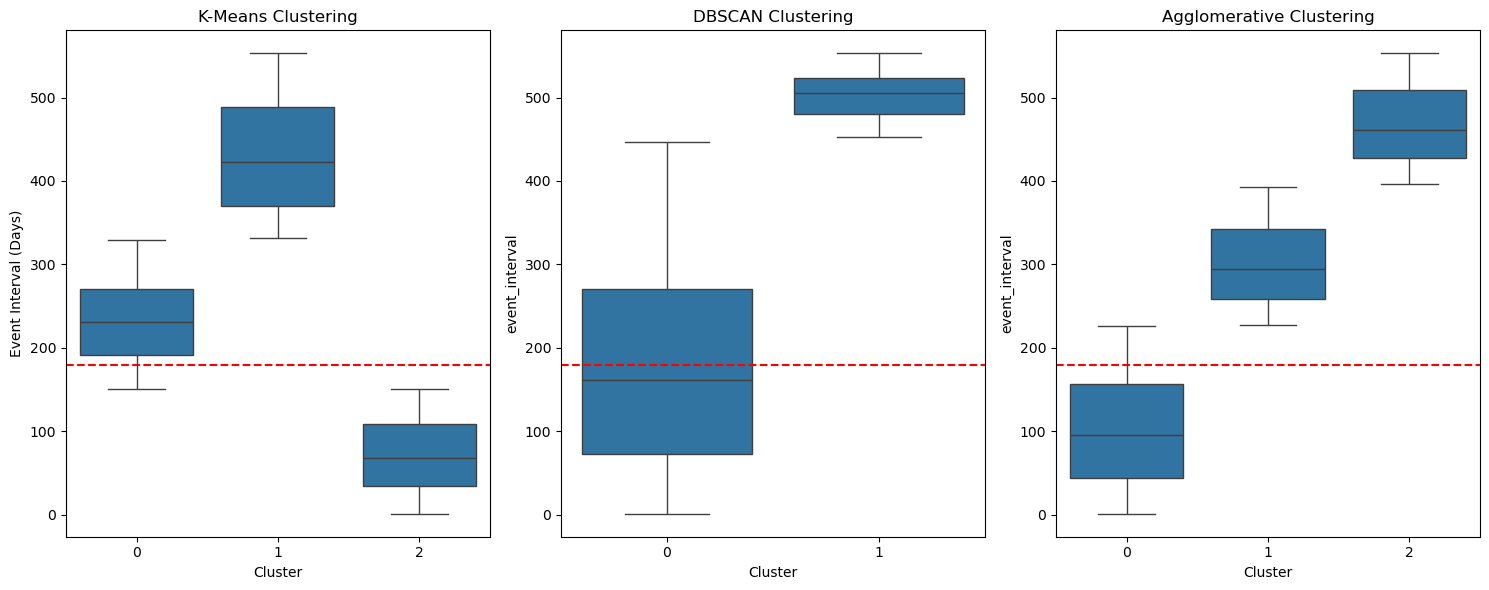

Silhouette Scores:
 - KMeans: 0.5961393774383681
 - DBSCAN: 0.49468489420800804
 - Agglomerative: 0.5681789886445706
Best clustering method based on silhouette score: K-Means


In [91]:
# Simulating prescription data
np.random.seed(42)
n_patients = 500
n_prescriptions = 2000

data = pd.DataFrame({
    'PATIENT_ID': np.random.randint(1, n_patients, n_prescriptions),
    'DATE': pd.date_range(start='2020-01-01', periods=n_prescriptions, freq='D')
})

data['prev_DATE'] = data.groupby('PATIENT_ID')['DATE'].shift(1)
data.dropna(inplace=True)
data['event_interval'] = (data['DATE'] - data['prev_DATE']).dt.days

# Remove the upper 20% 
threshold = np.percentile(data['event_interval'], 80)
data = data[data['event_interval'] <= threshold]

# K-Means 
X = data[['event_interval']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans_labels

#  DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_cluster'] = dbscan_labels

#  Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
data['agglo_cluster'] = agglo_labels

# Boxplot 
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=data['kmeans_cluster'], y=data['event_interval'])
plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('K-Means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Event Interval (Days)')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['dbscan_cluster'], y=data['event_interval'])
plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('DBSCAN Clustering')
plt.xlabel('Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['agglo_cluster'], y=data['event_interval'])
plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
plt.title('Agglomerative Clustering')
plt.xlabel('Cluster')

plt.tight_layout()
plt.show()

# Compare silhouette scores
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_agglo = silhouette_score(X, agglo_labels)

print(f'Silhouette Scores:\n - KMeans: {silhouette_kmeans}\n - DBSCAN: {silhouette_dbscan}\n - Agglomerative: {silhouette_agglo}')

# Insights
best_method = max([(silhouette_kmeans, 'K-Means'), (silhouette_dbscan, 'DBSCAN'), (silhouette_agglo, 'Agglomerative')], key=lambda x: x[0])
print(f'Best clustering method based on silhouette score: {best_method[1]}')


INSIGHTS

K-Means: Fast and efficient but sensitive to outliers. Works best with well-separated clusters.

DBSCAN: Handles noise and irregular patterns well but struggles with varying densities.

Agglomerative Clustering: More accurate for small groups but slower on large datasets.

K-Means for speed

Agglomerative for accuracy 

DBSCAN for noise handling


ADDITIONAL TASK

SIMULATE DATA FUNCTION

In [17]:

def simulate_data(n_patients=500, n_prescriptions=2000):
    np.random.seed(42)
    data = pd.DataFrame({
        'PATIENT_ID': np.random.randint(1, n_patients, n_prescriptions),
        'DATE': pd.date_range(start='2020-01-01', periods=n_prescriptions, freq='D')
    })
    data['prev_DATE'] = data.groupby('PATIENT_ID')['DATE'].shift(1)
    data.dropna(inplace=True)
    data['event_interval'] = (data['DATE'] - data['prev_DATE']).dt.days
    return data

PREPROCESS DATA FUNCTION

In [19]:

def preprocess_data(data):
    threshold = np.percentile(data['event_interval'], 80)
    return data[data['event_interval'] <= threshold]

KMEANS, DBSCANN, AGGLOMERATIVE CLUSTERING FUNCTION

In [21]:
#clustering function
def apply_clustering(data):
    X = data[['event_interval']]
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    data['kmeans_cluster'] = kmeans_labels
    
    dbscan = DBSCAN(eps=5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    data['dbscan_cluster'] = dbscan_labels
    
    agglo = AgglomerativeClustering(n_clusters=3)
    agglo_labels = agglo.fit_predict(X)
    data['agglo_cluster'] = agglo_labels
    
    return data, kmeans_labels, dbscan_labels, agglo_labels

VISUALIZATION FUNCTION

In [23]:
#graph function
def visualize_results(data):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=data['kmeans_cluster'], y=data['event_interval'])
    plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
    plt.title('K-Means Clustering')
    plt.xlabel('Cluster')
    plt.ylabel('Event Interval (Days)')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data['dbscan_cluster'], y=data['event_interval'])
    plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Cluster')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data['agglo_cluster'], y=data['event_interval'])
    plt.axhline(y=data['event_interval'].median(), color='red', linestyle='dashed')
    plt.title('Agglomerative Clustering')
    plt.xlabel('Cluster')
    
    plt.tight_layout()
    plt.show()

COMPARE RESULTS FUNCTION

In [27]:
#compare result function
def compare_performance(X, kmeans_labels, dbscan_labels, agglo_labels):
    silhouette_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    silhouette_agglo = silhouette_score(X, agglo_labels)
    
    print(f'Silhouette Scores:\n - KMeans: {silhouette_kmeans}\n - DBSCAN: {silhouette_dbscan}\n - Agglomerative: {silhouette_agglo}')
    
    best_method = max([(silhouette_kmeans, 'K-Means'), (silhouette_dbscan, 'DBSCAN'), (silhouette_agglo, 'Agglomerative')], key=lambda x: x[0])
    print(f'Best clustering method based on silhouette score: {best_method[1]}')

TEST FUNCTIONS

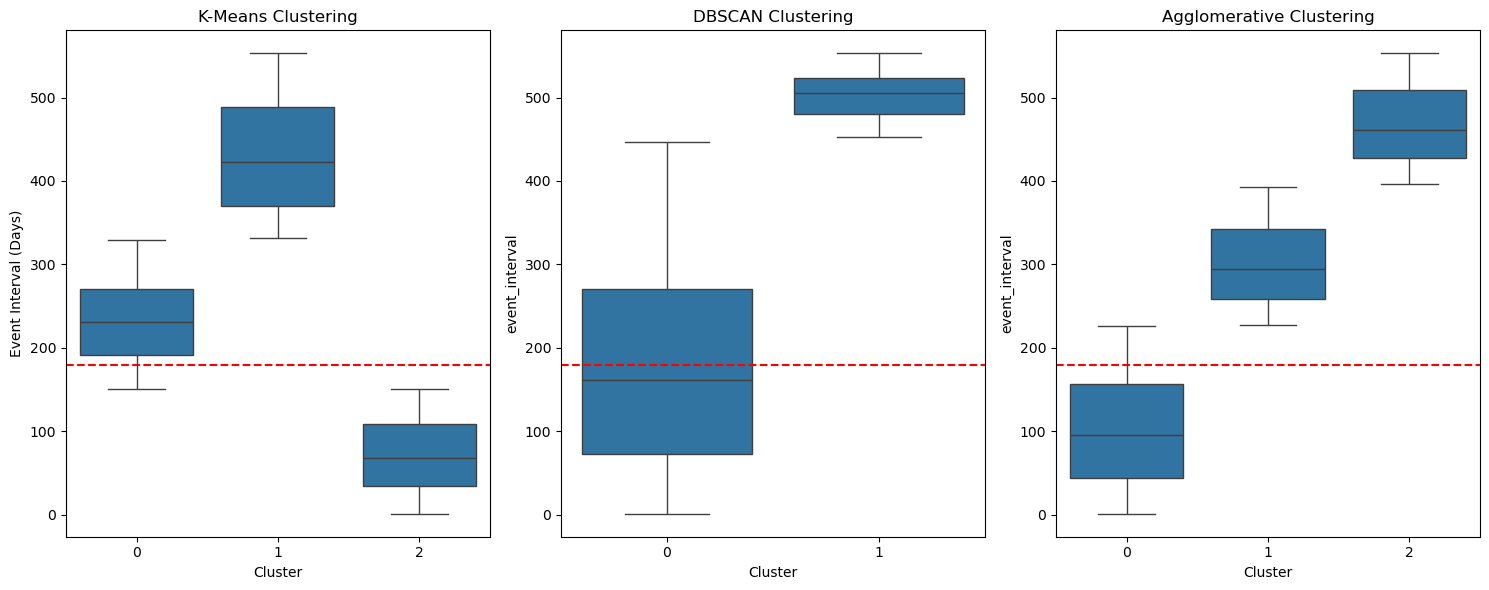

Silhouette Scores:
 - KMeans: 0.5961393774383681
 - DBSCAN: 0.49468489420800804
 - Agglomerative: 0.5681789886445706
Best clustering method based on silhouette score: K-Means


In [39]:
data = simulate_data()
data = preprocess_data(data)
data, kmeans_labels, dbscan_labels, agglo_labels = apply_clustering(data)
visualize_results(data)
compare_performance(data[['event_interval']], kmeans_labels, dbscan_labels, agglo_labels)



INSIGHTS

K-Means: Fast and efficient but sensitive to outliers. Works best with well-separated clusters.

DBSCAN: Handles noise and irregular patterns well but struggles with varying densities.

Agglomerative Clustering: More accurate for small groups but slower on large datasets.

K-Means for speed

Agglomerative for accuracy 

DBSCAN for noise handling